# KNN Algorithm for Yeast Data


In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd  
from math import floor, ceil, sqrt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
def the_train_test_split(X, test_ratio = 0.2):
    if(test_ratio >= 1 or test_ratio <0):
        test_ratio = 0.2
    row, _ = X.shape
    train_count = floor(row * (1-test_ratio)) 
    train = X[:train_count]
    test = X[train_count:]
    return train, test

In [3]:
def euclidean_distance(x,y):
    return sqrt(sum(np.square(x-y)))
 
def manhattan_distance(x,y):
    return sum(abs(x - y))
 
def chebyshev_distance(x,y):
    return max(abs(x - y))
 
def minkowski_distance(x,y, p, w):
    return sum(w * abs(x - y)^p)^(1/p)
 
def get_distance(x, y, algorithm ="euclidean"):
    '''
    three valid metrics:
    euclidean:
        sqrt(sum(np.square(x-y)))
    manhattan:
        return sum(abs(x - y))
        
    chebyshev:
        max(abs(x - y))
 
    '''
    if(algorithm == "euclidean"):
        return euclidean_distance(x,y)
    elif(algorithm == "manhattan"):
        return manhattan_distance(x,y)
    elif(algorithm == "chebyshev"):
        return chebyshev_distance(x,y)
    else:
        #print("The algorithm ", algorithm, " couldn't be recognized.\n", "\"euclidean\" algorithm is used instead")
        return euclidean_distance(x,y)
 

In [4]:
class K_Neigbours_Classifier():
    def __init__(self, neigbour_count = 7, algorithm = "euclidean"):
        self.alg = algorithm
        self.n_count = neigbour_count
 
    def fit(self, train_input, train_output):
        self.train_in = train_input
        self.train_out = train_output
        #
        pd.unique(self.train_out) # since it is array of arrays sized 1
        self.categories = pd.unique(self.train_out.ravel())
   
    def predict(self, single):
        # calculate the distances
        distances = np.apply_along_axis(get_distance, 1, self.train_in, y=single, algorithm=self.alg)
        #print(distances)
        nearest_indices = np.argpartition(distances, self.n_count)[:self.n_count]
        #print(nearest_indices)
        category_dict = dict.fromkeys(self.categories, 0)
        nearest_keys = self.train_out[nearest_indices]
        for neigbour_key in nearest_keys:
            category_dict[neigbour_key] = 1 + category_dict[neigbour_key]
        the_key_with_max = max(category_dict, key=category_dict.get)
        #print("We predict this one to be: ", the_key_with_max)
        return the_key_with_max

In [5]:
def measure(X_train, Y_train, X_test, Y_test, neigbour_count=13, algorithm="manhattan", output=True ):
    knc = K_Neigbours_Classifier(neigbour_count=neigbour_count, algorithm=algorithm)
    knc.fit(X_train, Y_train[:,0]) # we know that y_train is 1 dimensional 
    correct_pred = 0
    incorrect_pred = 0
    correct_pred_dict = dict.fromkeys(cat,0)
    failed_to_pred_dict = dict.fromkeys(cat,0)
    assumed_to_pred_dict = dict.fromkeys(cat,0)

    predictions = [] #= np.empty(Y_test.size,  dtype="S3")
    for i in range (Y_test.size):
        correct_key = Y_test[i][0]
        predicted_key =knc.predict(X_test[i])
        predictions.append(predicted_key)
        if(  predicted_key== correct_key):
            correct_pred = 1 + correct_pred
            correct_pred_dict[correct_key] = 1 + correct_pred_dict[correct_key]

        else:
            incorrect_pred = 1 + incorrect_pred
            failed_to_pred_dict[correct_key] = 1 + failed_to_pred_dict[correct_key]
            assumed_to_pred_dict[predicted_key] = 1 + assumed_to_pred_dict[predicted_key] 
    accuracy = correct_pred/(correct_pred + incorrect_pred)
    if output:
        print("Accuracy: ", correct_pred/(correct_pred + incorrect_pred) )
        print("Number of correct predictions: ", correct_pred)
        print("Number of incorrect predictions: ", incorrect_pred)
        print("correct predict(ion) count:\n", correct_pred_dict)
        print("failed_to predict(ion) count:\n", failed_to_pred_dict)
        print("assumed_to predict(ion) count:\n", assumed_to_pred_dict)
        

        print("\n                   Classification Report                  \n",
        classification_report(Y_test, predictions, zero_division=1)) # ignores zero division warning
        
        ConfusionMatrixDisplay.from_predictions(Y_test, predictions)
        plt.show()
    return accuracy

## Read the data

In [6]:
file_name = "yeast.csv" 
md = pd.read_csv(file_name)

# md.dropna(inplace = True)
# md.replace('unknown', 0, inplace = True)
md.head()


,DBName,1,2,3,4,5,6,7,8,OutName
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


## Prepare the data
* Separate the input and output variables
* Seperate the data into training and test sets
* Normalize the data


In [7]:
# Shuffle the data to get more fair representative
#md.reindex(np.random.permutation(md.index))

test_ratio = 0.2
X = md.values[:,1:9]
Y = md.values[:,9:]
cat = pd.unique(Y[:,0])

# normalize X:
for i in range(X.shape[1]):
    X[:,i] = (X[:,i] - X[:,i].mean())/X[:,i].std()

In [8]:
X_train, X_test = the_train_test_split(X, test_ratio = test_ratio)
Y_train, Y_test = the_train_test_split(Y, test_ratio = test_ratio)

Accuracy:  0.5993265993265994
Number of correct predictions:  178
Number of incorrect predictions:  119
correct predict(ion) count:
 {'MIT': 9, 'NUC': 42, 'CYT': 65, 'ME1': 17, 'EXC': 5, 'ME2': 3, 'ME3': 35, 'VAC': 0, 'POX': 2, 'ERL': 0}
failed_to predict(ion) count:
 {'MIT': 13, 'NUC': 23, 'CYT': 37, 'ME1': 4, 'EXC': 1, 'ME2': 5, 'ME3': 19, 'VAC': 15, 'POX': 2, 'ERL': 0}
assumed_to predict(ion) count:
 {'MIT': 21, 'NUC': 48, 'CYT': 39, 'ME1': 1, 'EXC': 5, 'ME2': 2, 'ME3': 3, 'VAC': 0, 'POX': 0, 'ERL': 0}

                   Classification Report                  
               precision    recall  f1-score   support

         CYT       0.62      0.64      0.63       102
         EXC       0.50      0.83      0.62         6
         ME1       0.94      0.81      0.87        21
         ME2       0.60      0.38      0.46         8
         ME3       0.92      0.65      0.76        54
         MIT       0.30      0.41      0.35        22
         NUC       0.47      0.65      0.54      

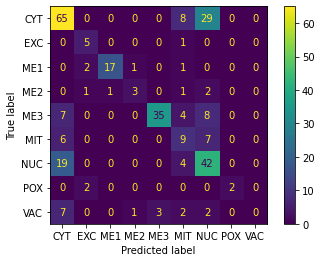

0.5993265993265994

In [9]:
measure(X_train, Y_train, X_test, Y_test, neigbour_count=25, algorithm="manhattan")

Accuracy:  0.5723905723905723
Number of correct predictions:  170
Number of incorrect predictions:  127
correct predict(ion) count:
 {'MIT': 9, 'NUC': 43, 'CYT': 59, 'ME1': 15, 'EXC': 4, 'ME2': 3, 'ME3': 35, 'VAC': 0, 'POX': 2, 'ERL': 0}
failed_to predict(ion) count:
 {'MIT': 13, 'NUC': 22, 'CYT': 43, 'ME1': 6, 'EXC': 2, 'ME2': 5, 'ME3': 19, 'VAC': 15, 'POX': 2, 'ERL': 0}
assumed_to predict(ion) count:
 {'MIT': 25, 'NUC': 52, 'CYT': 38, 'ME1': 2, 'EXC': 4, 'ME2': 3, 'ME3': 3, 'VAC': 0, 'POX': 0, 'ERL': 0}

                   Classification Report                  
               precision    recall  f1-score   support

         CYT       0.61      0.58      0.59       102
         EXC       0.50      0.67      0.57         6
         ME1       0.88      0.71      0.79        21
         ME2       0.50      0.38      0.43         8
         ME3       0.92      0.65      0.76        54
         MIT       0.26      0.41      0.32        22
         NUC       0.45      0.66      0.54      

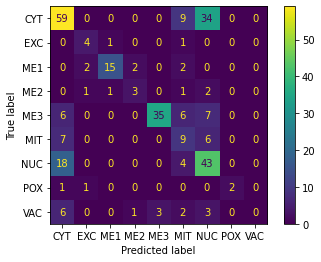

0.5723905723905723

In [10]:
measure(X_train, Y_train, X_test, Y_test, neigbour_count=13, algorithm="manhattan")

## Cross Validation to tune parameters

Firstly, we will tune $\lambda$ for each metric,\
then we will compare the best accuracy rates of metrics (which are in those $lambda$ values).

In [12]:
def cross_validate_knn(X_train, Y_train, min_lambda= 1, max_lambda=None, algorithm="euchattan", fold_k=10):
    size = ceil( X_train.shape[0]/fold_k)
    if max_lambda is None:
        max_lambda = floor(X_train.shape[0]/fold_k) # better to be sorry than  safe
    if min_lambda % 2 == 0:
        min_lambda = min_lambda + 1
    
    acc = {}
    ind = 0;
    for l in range(min_lambda, 1+max_lambda, 2):
        acc[l] = np.zeros(fold_k)
        for i in range(fold_k):
            x_tr = np.concatenate((X_train[0: i*size],X_train[(1+i)*size:]  ))
            x_te = X_train[i*size:(1+i)*size]
            y_tr = np.concatenate((Y_train[0: i*size],Y_train[(1+i)*size:]  ))
            y_te = Y_train[i*size:(1+i)*size]
            #print(y_te[:10])

            acc[l][i] = measure(x_tr,y_tr,x_te,y_te, neigbour_count=l, algorithm=algorithm, output=False)
        print( "l: ",l, " acc: ",acc[l], "avg ", np.mean(acc[l]))
        ind = ind+1
    return acc

### Tuning lambda for Manhattan metric 

In [12]:
man_cv = cross_validate_knn(X_train, Y_train, min_lambda= 1, max_lambda=35, algorithm="manhattan", fold_k=10)

l:  1  acc:  [0.53781513 0.45378151 0.45378151 0.43697479 0.49579832 0.37815126
 0.50420168 0.4789916  0.41176471 0.47413793] avg  0.46253984352361643
l:  3  acc:  [0.59663866 0.52941176 0.49579832 0.53781513 0.51260504 0.49579832
 0.5210084  0.51260504 0.39495798 0.55172414] avg  0.514836279339322
l:  5  acc:  [0.58823529 0.56302521 0.50420168 0.66386555 0.5210084  0.50420168
 0.51260504 0.55462185 0.40336134 0.59482759] avg  0.5409953636627065
l:  7  acc:  [0.60504202 0.53781513 0.55462185 0.67226891 0.54621849 0.5210084
 0.49579832 0.57142857 0.41176471 0.5862069 ] avg  0.5502173283106346
l:  9  acc:  [0.59663866 0.58823529 0.5210084  0.65546218 0.53781513 0.54621849
 0.55462185 0.54621849 0.40336134 0.56896552] avg  0.5518545349174152
l:  11  acc:  [0.59663866 0.56302521 0.5210084  0.63865546 0.54621849 0.51260504
 0.57142857 0.52941176 0.45378151 0.54310345] avg  0.547587655751956
l:  13  acc:  [0.59663866 0.55462185 0.51260504 0.63865546 0.55462185 0.47058824
 0.58823529 0.546218

In [13]:
man_best_l = -1
man_best_acc = 0
for l, arr in man_cv.items():
    m =np.mean(arr) 
    if  m> man_best_acc:
        man_best_l, man_best_acc = l, m
    print(l, " : ",m)
    
print("Best accuracy was: ", man_best_acc, " when lambda=", man_best_l)
#print(np.argmax(man_cv))

1  :  0.46253984352361643
3  :  0.514836279339322
5  :  0.5409953636627065
7  :  0.5502173283106346
9  :  0.5518545349174152
11  :  0.547587655751956
13  :  0.5501521298174442
15  :  0.5366632860040568
17  :  0.5526079397276151
19  :  0.5534700086931325
21  :  0.5441611127209505
23  :  0.5483627933932194
25  :  0.553404810199942
27  :  0.5533830773688786
29  :  0.5491813966966097
31  :  0.5432555780933063
33  :  0.5415531729933353
35  :  0.5457548536656042
Best accuracy was:  0.5534700086931325  when lambda= 19


### Tuning lambda for Euclidean metric

In [14]:
euc_cv = cross_validate_knn(X_train, Y_train, min_lambda= 1, max_lambda=35, algorithm="euclidean", fold_k=10)

l:  1  acc:  [0.54621849 0.42857143 0.47058824 0.48739496 0.50420168 0.42857143
 0.4789916  0.46218487 0.38655462 0.46551724] avg  0.46587945523036806
l:  3  acc:  [0.58823529 0.51260504 0.51260504 0.5210084  0.48739496 0.57142857
 0.48739496 0.46218487 0.41176471 0.53448276] avg  0.5089104607360185
l:  5  acc:  [0.58823529 0.54621849 0.50420168 0.66386555 0.55462185 0.53781513
 0.5210084  0.56302521 0.40336134 0.57758621] avg  0.5459939148073023
l:  7  acc:  [0.59663866 0.56302521 0.52941176 0.67226891 0.53781513 0.55462185
 0.50420168 0.55462185 0.36134454 0.53448276] avg  0.5408432338452622
l:  9  acc:  [0.61344538 0.56302521 0.52941176 0.68067227 0.52941176 0.54621849
 0.52941176 0.56302521 0.38655462 0.52586207] avg  0.5467038539553754
l:  11  acc:  [0.62184874 0.56302521 0.5210084  0.68067227 0.50420168 0.54621849
 0.53781513 0.56302521 0.41176471 0.53448276] avg  0.5484062590553462
l:  13  acc:  [0.61344538 0.55462185 0.51260504 0.69747899 0.55462185 0.5210084
 0.60504202 0.5630

In [15]:
euc_best_l = -1
euc_best_acc = 0
for l, arr in euc_cv.items():
    m =np.mean(arr) 
    if  m> euc_best_acc:
        euc_best_l, euc_best_acc = l, m
    print(l, " : ",m)
    
print("Best accuracy was: ", euc_best_acc, " when lambda=", euc_best_l)
#print(np.argmax(euc_cv))

1  :  0.46587945523036806
3  :  0.5089104607360185
5  :  0.5459939148073023
7  :  0.5408432338452622
9  :  0.5467038539553754
11  :  0.5484062590553462
13  :  0.5576499565343378
15  :  0.5618951028687337
17  :  0.5517893364242249
19  :  0.560257896261953
21  :  0.55515068096204
23  :  0.5559040857722399
25  :  0.5525427412344248
27  :  0.5575412923790206
29  :  0.5542016806722689
31  :  0.5508403361344538
33  :  0.55
35  :  0.551658939437844
Best accuracy was:  0.5618951028687337  when lambda= 15


### Tuning lambda for Chebyshev metric

In [13]:
cheb_cv = cross_validate_knn(X_train, Y_train, min_lambda= 1, max_lambda=35, algorithm="chebyshev", fold_k=10)

l:  1  acc:  [0.51260504 0.43697479 0.48739496 0.51260504 0.48739496 0.41176471
 0.45378151 0.46218487 0.40336134 0.46551724] avg  0.4633584468270067
l:  3  acc:  [0.51260504 0.44537815 0.50420168 0.60504202 0.50420168 0.47058824
 0.47058824 0.49579832 0.3697479  0.46551724] avg  0.48436685018835124
l:  5  acc:  [0.54621849 0.54621849 0.48739496 0.62184874 0.56302521 0.52941176
 0.52941176 0.55462185 0.40336134 0.57758621] avg  0.535909881193857
l:  7  acc:  [0.54621849 0.57983193 0.51260504 0.65546218 0.53781513 0.49579832
 0.51260504 0.55462185 0.40336134 0.50862069] avg  0.5306940017386265
l:  9  acc:  [0.55462185 0.59663866 0.56302521 0.6302521  0.57142857 0.5210084
 0.51260504 0.55462185 0.41176471 0.48275862] avg  0.5398725007244277
l:  11  acc:  [0.60504202 0.57983193 0.57983193 0.62184874 0.54621849 0.50420168
 0.53781513 0.57983193 0.42857143 0.48275862] avg  0.546595189800058
l:  13  acc:  [0.59663866 0.59663866 0.53781513 0.6302521  0.53781513 0.48739496
 0.54621849 0.554621

In [14]:
che_best_l = -1
che_best_acc = 0
for l, arr in cheb_cv.items():
    m =np.mean(arr) 
    if  m> che_best_acc:
        che_best_l, che_best_acc = l, m
    print(l, " : ",m)
    
print("Best accuracy was: ", che_best_acc, " when lambda=", che_best_l)
print(np.argmax(cheb_cv))

1  :  0.4633584468270067
3  :  0.48436685018835124
5  :  0.535909881193857
7  :  0.5306940017386265
9  :  0.5398725007244277
11  :  0.546595189800058
13  :  0.5382135612865836
15  :  0.534873949579832
17  :  0.5373949579831934
19  :  0.5425021732831063
21  :  0.5391190959142278
23  :  0.5298319327731092
25  :  0.5289263981454652
27  :  0.5348522167487685
29  :  0.5239278470008693
31  :  0.523152709359606
33  :  0.5348739495798319
35  :  0.5373732251521298
Best accuracy was:  0.546595189800058  when lambda= 11
0
